<a href="https://colab.research.google.com/github/shengyi2/spectrum_analysis/blob/main/96_well_plate_screening_for_K%2B_indicator_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Excel file
- Define functions and import modules
- this part needs to be run correctly before the next section
- need to choose a file for upload after running the 3rd cell

In [ ]:
# import modules 
from google.colab import files
import pandas as pd
import numpy as np

In [ ]:
# open the excel or csv file
def import_Colab(variable):
  print('Import',variable,'data')
 
  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    # read excel
  xls = pd.ExcelFile(fn)  

  return xls

In [ ]:

# import Excel file with multiple sheets
xls =import_Colab('96-well screening')

Import 96-well screening data


Saving 20210421 RINKO.xlsx to 20210421 RINKO.xlsx
User uploaded file "20210421 RINKO.xlsx" with length 104847 bytes


# Organize data in the Excel
  - separate sheets in the Excel files and store in the dictionary Data_sheet

In [ ]:
xls.sheet_names

['Sheet3', 'Sheet4']

In [ ]:
Data_sheet={}
i=0
for name in xls.sheet_names:
  Data_sheet[i]=pd.read_excel(xls, name)
  i+=1
Data_sheet

{0:     SAFIRE II;   Serial number: 501000006;   Firmware: V 1.35 08/2005 Safire2;   XFLUOR4SAFIREII Version: V 4.62n  ... Unnamed: 97
 0                                                Date:                                                             ...         NaN
 1                                                Time:                                                             ...         NaN
 2                                                  NaN                                                             ...         NaN
 3                                    Measurement mode:                                                             ...         NaN
 4                                Wavelength scan type:                                                             ...         NaN
 ..                                                 ...                                                             ...         ...
 131                                                744                  

# Cleaning data (Trimming the unnecessary part)

In [ ]:
# trimming the table with NaN
def trim(df):
  # Drop rows with setting parameters
  df=df.dropna()
  # reset row index (0  1 2 3 4...)
  df=df.reset_index()
  df=df.drop('index',axis=1)
  # replacing column index with first row (Wavelength: A1 A2 A3 ....)
  df.columns=df.iloc[0,:]
  df=df.drop(0,axis=0)
  return df



In [ ]:
drop_sheet=[]
for index in Data_sheet:
# remove sheet with limited rows (aborted trials or empty sheets)
# Trim the others in an organized fashion
  if Data_sheet[index].shape[0]<40: 
  # let's set the limit at 40, anything less than 40 is considered aborted
  # edit the row number if you need to change the limit
    drop_sheet.append(index) #store the indeces of sheets to be dropped
  else:
    Data_sheet[index]=trim(Data_sheet[index]) #clean good data
for index in drop_sheet:
  del Data_sheet[index] # drop aborted or empty sheets
Data_sheet

{0: 0   Wavelength:  A1  A2  A3  A4  A5  A6  A7  ...  H6  H7  H8  H9 H10 H11 H12      Em
 1           550  21  18  13  11   8  13  15  ...  12  11  12  13  22  18  14  1.1834
 2           552  15  20  12  12  11  10  10  ...  13   8  12  14  20  17  14  1.1917
 3           554  17  20  12  12  10  12  11  ...  11  10  11  13  19  16  14  1.1993
 4           556  17  19  18  16   8  11   7  ...  11   8  12  12  21  19  15  1.2084
 5           558  24  27  21  12   9  13  11  ...  11   9  13  13  19  22  17  1.2175
 ..          ...  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..     ...
 96          740  27  43  35   5   5   5   3  ...   8   5  11   8   8   8   8  2.6752
 97          742  27  44  30   5   3   5   0  ...  11   5  11   8  11   8  11  2.7233
 98          744  19  33  33   3   3   6   3  ...   6   8   6   6  11  11  11  2.7725
 99          746  23  31  23   6   0   0   0  ...   6   8   8   8  11   8  11  2.8246
 100         748  23  26  20   3   3   3   6  ...  

In [ ]:
# drop the correction column Em
for index in Data_sheet:
  if 'Em' in Data_sheet[index]:
    Data_sheet[index]=Data_sheet[index].drop('Em', axis=1)
  if 'Ex' in Data_sheet[index]:
    Data_sheet[index]=Data_sheet[index].drop('Ex', axis=1)


In [ ]:
# convert objects to integers
for index in Data_sheet:
  Data_sheet[index]=Data_sheet[index].astype(str).astype(int)

In [ ]:
Data_sheet[0].describe()

,Wavelength:,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,D1,D2,D3,...,E9,E10,E11,E12,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.0000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,649.000000,185.680000,283.020000,218.090000,25.520000,10.930000,16.480000,11.000000,18.680000,17.400000,67.610000,68.190000,24.640000,22.320000,13.130000,14.02000,23.760000,11.630000,10.760000,11.350000,17.220000,11.540000,15.030000,23.980000,43.78000,22.200000,18.930000,15.5900,13.05000,10.760000,12.320000,10.960000,10.350000,11.66000,16.450000,19.460000,16.100000,22.690000,22.730000,36.250000,...,11.850000,15.270000,23.240000,65.390000,50.500000,34.680000,63.400000,10.590000,10.070000,13.270000,11.050000,14.490000,24.310000,16.750000,21.610000,53.540000,19.900000,15.120000,13.410000,11.310000,10.690000,7.700000,15.650000,22.770000,29.87000,13.240000,13.950000,14.510000,75.550000,36.840000,25.230000,15.880000,14.000000,12.450000,10.540000,18.370000,19.240000,31.700000,38.130000,49.810000
std,58.022984,153.501349,237.908563,184.616999,17.725448,6.892032,10.120965,6.411795,12.807731,10.797493,52.856752,54.154231,17.634058,14.485018,7.759849,8.62224,14.359117,6.821912,6.067166,6.336323,10.237167,5.881696,9.759176,16.402131,32.98686,14.823541,12.126651,9.6746,7.59103,5.339239,6.749306,5.927031,5.095799,6.39163,9.724877,11.943825,9.477778,13.248743,13.525774,24.839027,...,5.207561,7.172978,13.194826,48.159645,36.083937,23.019043,45.079279,4.146545,3.385217,6.086672,4.684759,6.968174,14.535012,8.778273,11.988121,38.753669,9.537274,6.862694,5.858767,4.319781,4.135813,2.227015,8.090867,13.722984,20.26474,5.503204,6.598707,7.071775,56.906334,24.227341,13.783942,7.217095,6.066966,4.595507,3.328542,8.366184,9.962678,17.755636,23.902012,35.012752
min,550.000000,15.000000,18.000000,12.000000,3.000000,-3.000000,0.000000,0.000000,0.000000,3.000000,6.000000,6.000000,3.000000,3.000000,3.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,5.00000,3.000000,3.000000,0.0000,0.00000,3.000000,0.000000,0.000000,0.000000,3.00000,3.000000,0.000000,0.000000,3.000000,5.000000,5.000000,...,0.000000,3.000000,5.000000,11.000000,6.000000,6.000000,11.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000,5.000000,8.000000,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.00000,5.000000,3.000000,3.000000,13.000000,8.000000,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,8.000000,8.000000,6.000000
25%,599.500000,49.000000,76.750000,56.500000,11.000000,5.000000,8.000000,5.000000,8.000000,8.000000,21.000000,19.750000,10.000000,11.000000,6.750000,6.75000,11.000000,6.000000,5.000000,6.000000,8.000000,6.000000,7.000000,10.000000,15.00000,10.000000,8.000000,8.0000,7.00000,5.000000,7.000000,6.000000,5.750000,6.00000,8.000000,9.000000,8.000000,11.000000,11.000000,14.000000,...,8.000000,10.000000,11.750000,23.750000,20.000000,14.750000,23.000000,8.000000,8.000000,9.000000,7.750000,8.000000,11.000000,9.000000,11.750000,19.000000,11.000000,10.

# Find the maximum of each column of each spreadsheet

In [ ]:
maximum_series={}
maximum_list={}
for index in Data_sheet:
  maximum_series[index]=Data_sheet[index].max()
  maximum_list[index]=maximum_series[index][1:].tolist()

In [ ]:
maximum_series


{0: 0
 Wavelength:    748
 A1             502
 A2             767
 A3             599
 A4              59
               ... 
 H8              37
 H9              41
 H10             69
 H11             86
 H12            124
 Length: 97, dtype: int64, 1: 0
 Wavelength:    748
 A1             674
 A2             753
 A3             922
 A4              86
               ... 
 H8              35
 H9              34
 H10             75
 H11             90
 H12            135
 Length: 97, dtype: int64}

In [ ]:
maximum_list

{0: [502,
  767,
  599,
  59,
  25,
  38,
  26,
  43,
  41,
  181,
  180,
  62,
  53,
  30,
  34,
  52,
  26,
  23,
  24,
  37,
  24,
  36,
  59,
  110,
  55,
  44,
  36,
  29,
  23,
  28,
  24,
  20,
  27,
  35,
  42,
  35,
  52,
  52,
  90,
  34,
  20,
  33,
  23,
  19,
  32,
  37,
  62,
  90,
  191,
  41,
  59,
  45,
  23,
  121,
  60,
  45,
  22,
  32,
  52,
  165,
  127,
  87,
  155,
  19,
  17,
  26,
  20,
  29,
  59,
  36,
  47,
  130,
  39,
  30,
  27,
  20,
  20,
  12,
  35,
  54,
  75,
  24,
  28,
  30,
  197,
  90,
  54,
  32,
  28,
  22,
  18,
  37,
  41,
  69,
  86,
  124],
 1: [674,
  753,
  922,
  86,
  38,
  47,
  33,
  68,
  50,
  242,
  263,
  77,
  70,
  36,
  39,
  66,
  31,
  32,
  30,
  42,
  29,
  46,
  82,
  147,
  67,
  59,
  47,
  45,
  30,
  38,
  36,
  30,
  35,
  42,
  64,
  43,
  71,
  85,
  123,
  41,
  26,
  38,
  30,
  25,
  32,
  41,
  74,
  130,
  293,
  54,
  72,
  54,
  28,
  162,
  83,
  67,
  31,
  41,
  58,
  252,
  185,
  118,
  209,
  22,
  23,

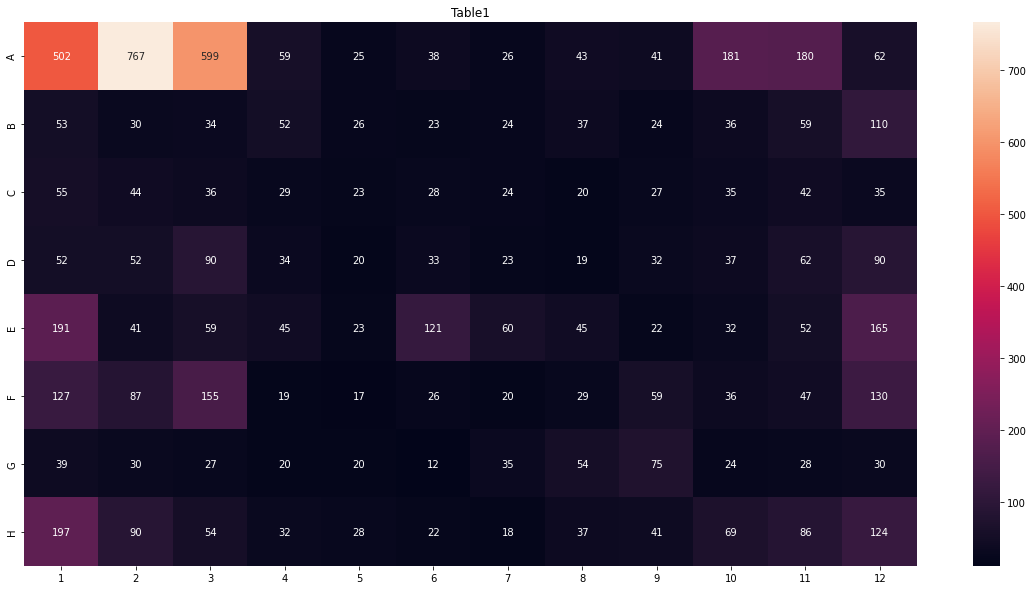

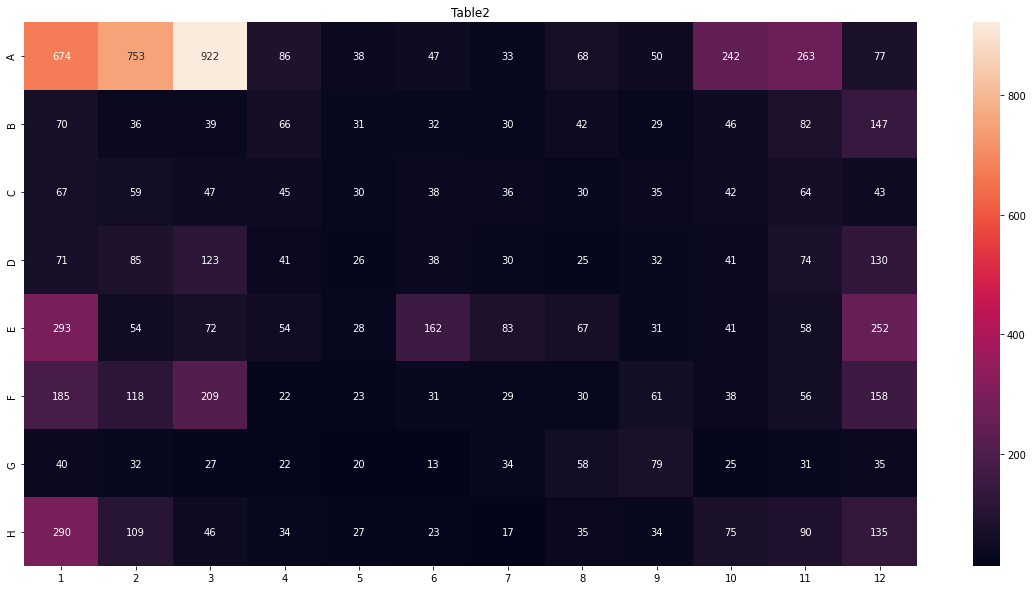

In [ ]:
graph_list={}
graph_table={}
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for index in Data_sheet:

  graph_list[index] = [maximum_list[index][i:i+12] for i in range(0, len(maximum_list[0]), 12)]
  Index= ['A','B','C','D','E','F','G','H']
  Cols = [1,2,3,4,5,6,7,8,9,10,11,12]
  graph_table[index]= pd.DataFrame(graph_list[index], columns=Cols, index=Index)


  fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
  ax.set_title('Table'+str(index+1))
  sns.heatmap(graph_table[index], annot=True,fmt='.0f',ax=ax)
  
  fig.savefig('maximum_heatmap '+str(index+1)+'.png')

# Find the ratio between two sheets

In [ ]:
import numpy as np
dynamic_range_table={}
for index in Data_sheet:
  maximum_series[index]=Data_sheet[index].max()


dynamic_range_table[0]=maximum_series[1]/maximum_series[0]
dynamic_range_table[0]=dynamic_range_table[0][1:]
dynamic_range_table[0]


0
A1     1.342629
A2     0.981747
A3     1.539232
A4     1.457627
A5     1.520000
         ...   
H8     0.945946
H9     0.829268
H10    1.086957
H11    1.046512
H12    1.088710
Length: 96, dtype: float64

In [ ]:
type(dynamic_range_table[0])

pandas.core.series.Series

In [ ]:
dynamic_range=[]
dynamic_range=dynamic_range_table[0].values
print(dynamic_range)
print(dynamic_range_table[0])

[1.34262948 0.98174707 1.53923205 1.45762712 1.52       1.23684211
 1.26923077 1.58139535 1.2195122  1.33701657 1.46111111 1.24193548
 1.32075472 1.2        1.14705882 1.26923077 1.19230769 1.39130435
 1.25       1.13513514 1.20833333 1.27777778 1.38983051 1.33636364
 1.21818182 1.34090909 1.30555556 1.55172414 1.30434783 1.35714286
 1.5        1.5        1.2962963  1.2        1.52380952 1.22857143
 1.36538462 1.63461538 1.36666667 1.20588235 1.3        1.15151515
 1.30434783 1.31578947 1.         1.10810811 1.19354839 1.44444444
 1.53403141 1.31707317 1.22033898 1.2        1.2173913  1.33884298
 1.38333333 1.48888889 1.40909091 1.28125    1.11538462 1.52727273
 1.45669291 1.35632184 1.3483871  1.15789474 1.35294118 1.19230769
 1.45       1.03448276 1.03389831 1.05555556 1.19148936 1.21538462
 1.02564103 1.06666667 1.         1.1        1.         1.08333333
 0.97142857 1.07407407 1.05333333 1.04166667 1.10714286 1.16666667
 1.47208122 1.21111111 0.85185185 1.0625     0.96428571 1.0454

[array([1.34262948, 0.98174707, 1.53923205, 1.45762712, 1.52      ,
       1.23684211, 1.26923077, 1.58139535, 1.2195122 , 1.33701657,
       1.46111111, 1.24193548]), array([1.32075472, 1.2       , 1.14705882, 1.26923077, 1.19230769,
       1.39130435, 1.25      , 1.13513514, 1.20833333, 1.27777778,
       1.38983051, 1.33636364]), array([1.21818182, 1.34090909, 1.30555556, 1.55172414, 1.30434783,
       1.35714286, 1.5       , 1.5       , 1.2962963 , 1.2       ,
       1.52380952, 1.22857143]), array([1.36538462, 1.63461538, 1.36666667, 1.20588235, 1.3       ,
       1.15151515, 1.30434783, 1.31578947, 1.        , 1.10810811,
       1.19354839, 1.44444444]), array([1.53403141, 1.31707317, 1.22033898, 1.2       , 1.2173913 ,
       1.33884298, 1.38333333, 1.48888889, 1.40909091, 1.28125   ,
       1.11538462, 1.52727273]), array([1.45669291, 1.35632184, 1.3483871 , 1.15789474, 1.35294118,
       1.19230769, 1.45      , 1.03448276, 1.03389831, 1.05555556,
       1.19148936, 1.21538462]

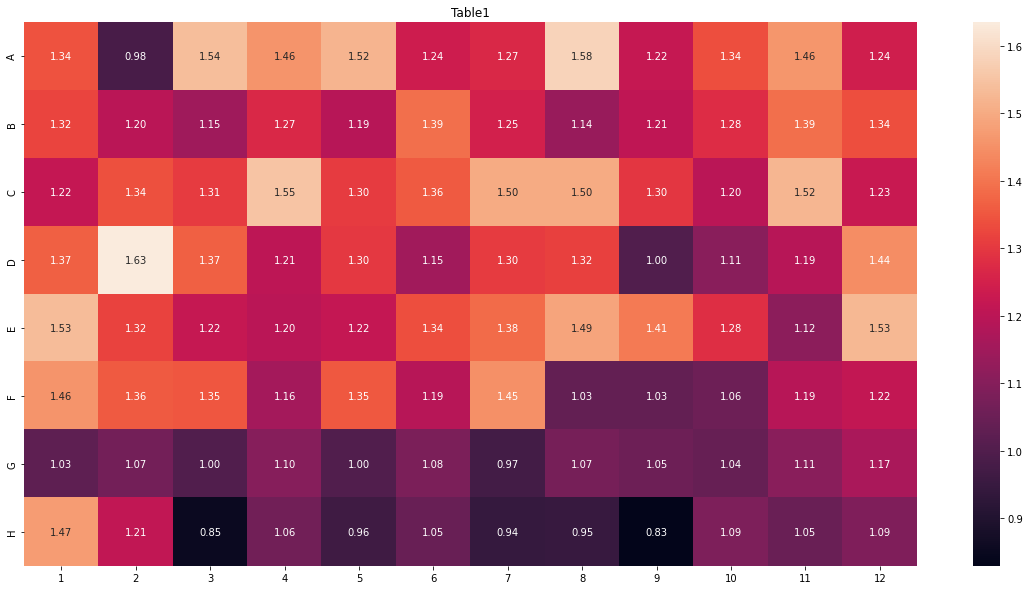

In [ ]:
graph_list={}
graph_table={}
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for index in dynamic_range_table:

  graph_list[index] = [dynamic_range[i:i+12] for i in range(0, len(dynamic_range), 12)]
  print(graph_list[index])
  Index= ['A','B','C','D','E','F','G','H']
  Cols = [1,2,3,4,5,6,7,8,9,10,11,12]
  graph_table[index]= pd.DataFrame(graph_list[index], columns=Cols, index=Index)
  print(graph_table[index])

  fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
  ax.set_title('Table'+str(index+1))
  sns.heatmap(graph_table[index], annot=True,fmt='.2f',ax=ax)
  
  fig.savefig('dynamic range '+str(index+1)+'.png')

# plot dynamic range vs brightness

In [39]:
# create names from A1 to H12
Index= ['A','B','C','D','E','F','G','H']
Cols = [1,2,3,4,5,6,7,8,9,10,11,12]
labels=[]
for index in Index:
  for col in Cols:
 
    string=index+str(col)
    labels.append(string)


In [40]:
XY_data={}
figure_table={}
import plotly.express as px
for index in Data_sheet:

  XY_data[index] = {'Labels':labels,'Dynamic range': dynamic_range, 'Fluorescence intensity': maximum_list[index]}
  figure_table[index] = pd.DataFrame(data=XY_data[index])
  figure_table[index]
  fig = px.scatter(figure_table[index], x="Dynamic range", y="Fluorescence intensity", 
                title="Table "+str(index+1),hover_name="Labels", hover_data=["Dynamic range", "Fluorescence intensity"])
  fig.show()
  fig.write_html('Fluorescence vs. Dynamic range '+str(index+1)+'.html')